# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import mpl_toolkits
from statistics import stdev 

# Loading Data

In [2]:
data = pd.read_csv('data/ex1data2.txt', sep=",", header=None)
data.columns = ["Size", "Bedrooms", "Price"]
data.head(5)

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# Plotting the data

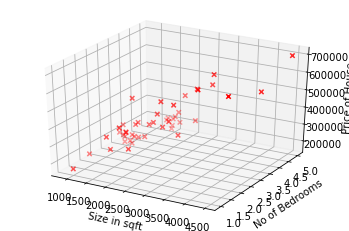

In [3]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Size, data.Bedrooms, data.Price, c='r', marker='x')
ax.set_xlabel("Size in sqft")
ax.set_ylabel("No of Bedrooms")
ax.set_zlabel("Price of House")
plt.show()

# Feature Normalization

In [4]:
size_mean = data.Size.mean()
size_std = stdev(data.Size)
bedrooms_mean = data.Bedrooms.mean()
bedrooms_std = stdev(data.Bedrooms)

size_norm = np.array([])
bedrooms_norm = np.array([])
m = data.Size.size
for i in range(m):
    norm_s = (data.Size[i] - size_mean) / (size_std)
    size_norm = np.append(size_norm, norm_s)
    norm_b = (data.Bedrooms[i] - bedrooms_mean) / (bedrooms_std)
    bedrooms_norm = np.append(bedrooms_norm, norm_b)
print(size_norm)
print(bedrooms_norm)

[ 1.30009869e-01 -5.04189838e-01  5.02476364e-01 -7.35723065e-01
  1.25747602e+00 -1.97317285e-02 -5.87239800e-01 -7.21881404e-01
 -7.81023044e-01 -6.37573110e-01 -7.63567023e-02 -8.56737193e-04
 -1.39273340e-01  3.11729182e+00 -9.21956312e-01  3.76643089e-01
 -8.56523009e-01 -9.62222960e-01  7.65467909e-01  1.29648433e+00
 -2.94048269e-01 -1.41790005e-01 -4.99156507e-01 -4.86733818e-02
  2.37739217e+00 -1.13335621e+00 -6.82873089e-01  6.61026291e-01
  2.50809813e-01  8.00701226e-01 -2.03448310e-01 -1.25918949e+00
  4.94765729e-02  1.42986760e+00 -2.38681627e-01 -7.09298077e-01
 -9.58447962e-01  1.65243186e-01  2.78635031e+00  2.02993169e-01
 -4.23656542e-01  2.98626458e-01  7.12617934e-01 -1.00752294e+00
 -1.44542274e+00 -1.87089985e-01 -1.00374794e+00]
[-0.22367519 -0.22367519 -0.22367519 -1.53776691  1.09041654  1.09041654
 -0.22367519 -0.22367519 -0.22367519 -0.22367519  1.09041654 -0.22367519
 -0.22367519  2.40450826 -0.22367519  1.09041654 -1.53776691 -0.22367519
  1.09041654  1.

# Gradient Descent

In [5]:
W = np.array([])
for i in range(3):
    W = np.append(W, 0.1)
W = W.reshape(-1, 3)

X = np.array([1, size_norm[0], bedrooms_norm[0]])
X = X.reshape(-1, 1)
for i in range(1, m):
    c = np.array([1, size_norm[i], bedrooms_norm[i]])
    X = np.column_stack((X, c))

epochs = 500
cost = np.array([])    
for i in range(epochs):
    print("Iterations : " + str(i))
    # Matrix Dot product    
    h_x = np.dot(W, X)

    # Loss calculation
    y = np.array(data.Price)
    y = y.reshape(-1, m)
    t = h_x - y
    t = t**2
    loss = 1/(2*m) * t.sum()

    print("Loss : " + str(loss))
    cost = np.append(cost, loss)
    o = h_x - y
    o = o.T
    der = np.dot(X,o)
    der = der.T
    alpha = 0.1
    W = W - alpha * (1/m) * der

Iterations : 0
Loss : 65591498189.55
Iterations : 1
Loss : 53294040447.82551
Iterations : 2
Loss : 43427042550.16982
Iterations : 3
Loss : 35499611459.07861
Iterations : 4
Loss : 29122552849.281506
Iterations : 5
Loss : 23986652450.969326
Iterations : 6
Loss : 19845761251.582703
Iterations : 7
Loss : 16503580658.533648
Iterations : 8
Loss : 13803307393.835278
Iterations : 9
Loss : 11619496252.11971
Iterations : 10
Loss : 9851648604.750134
Iterations : 11
Loss : 8419147990.665898
Iterations : 12
Loss : 7257250406.419941
Iterations : 13
Loss : 6313902746.657984
Iterations : 14
Loss : 5547213274.231395
Iterations : 15
Loss : 4923436762.688986
Iterations : 16
Loss : 4415366856.8595295
Iterations : 17
Loss : 4001051344.9719043
Iterations : 18
Loss : 3662764014.6188755
Iterations : 19
Loss : 3386180774.3775997
Iterations : 20
Loss : 3159718673.3393793
Iterations : 21
Loss : 2974005035.4714127
Iterations : 22
Loss : 2821450674.592659
Iterations : 23
Loss : 2695906475.36519
Iterations : 24
Los

Iterations : 370
Loss : 2043280050.6028383
Iterations : 371
Loss : 2043280050.602838
Iterations : 372
Loss : 2043280050.602837
Iterations : 373
Loss : 2043280050.6028364
Iterations : 374
Loss : 2043280050.6028364
Iterations : 375
Loss : 2043280050.6028354
Iterations : 376
Loss : 2043280050.6028345
Iterations : 377
Loss : 2043280050.6028335
Iterations : 378
Loss : 2043280050.6028337
Iterations : 379
Loss : 2043280050.6028335
Iterations : 380
Loss : 2043280050.602833
Iterations : 381
Loss : 2043280050.6028326
Iterations : 382
Loss : 2043280050.602832
Iterations : 383
Loss : 2043280050.6028316
Iterations : 384
Loss : 2043280050.6028311
Iterations : 385
Loss : 2043280050.602831
Iterations : 386
Loss : 2043280050.6028302
Iterations : 387
Loss : 2043280050.602831
Iterations : 388
Loss : 2043280050.602831
Iterations : 389
Loss : 2043280050.6028306
Iterations : 390
Loss : 2043280050.6028302
Iterations : 391
Loss : 2043280050.6028297
Iterations : 392
Loss : 2043280050.60283
Iterations : 393
Los

# Loss Function Graph

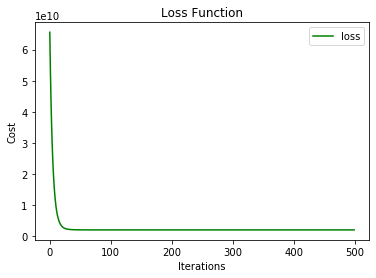

In [6]:
iterations = [i for i in range(epochs)]
plt.plot(iterations, cost, label= "loss", color= "green")
plt.ylabel('Cost')  
plt.xlabel('Iterations') 
plt.title('Loss Function') 
plt.legend() 
plt.show() 

# Prediction

In [7]:
x0 = 1
x1 = 1650
x2 = 3
x1 = (x1 - size_mean) / size_std
x2 = (x2 - bedrooms_mean) / bedrooms_std
w0 = W[0][0]
w1 = W[0][1]
w2 = W[0][2]

pred = x0*w0 + x1*w1 + x2*w2
print("Predicted House Price : " + str(pred))

Predicted House Price : 293081.46433841647


# Normal Equation

In [29]:
X = np.array([1, data.Size[0], data.Bedrooms[0]])
X = X.reshape(-1, 3)
for i in range(1, m):
    r = np.array([1, data.Size[i], data.Bedrooms[i]])
    X = np.row_stack((X, r))
    
y = np.array([data.Price])
y = y.reshape(-1, 1)

X_t = X.T    
a = np.dot(X_t, X)
a = np.linalg.inv(a)
b = np.dot(X_t, y)
W = np.dot(a, b)
print(W)

[[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


# Prediction using Normal Equation

In [30]:
x0 = 1
x1 = 1650
x2 = 3
w0 = W[0][0]
w1 = W[1][0]
w2 = W[2][0]
pred = x0*w0 + x1*w1 + x2*w2
print("Predicted House Price : " + str(pred))

Predicted House Price : 293081.4643348931
